**1. Using Machine Learning Naive Bayes Classifier to Solve Problems**

1.1. Given the training data in the table below (Buy Computer data), we need to predict the classes of a new example using Naïve Bayes classification. $E$ = age<=30, income=medium, student=yes, credit-rating=fair. $E_1$ is age<=30, $E_2$ is income=medium, $E_3$  is student=yes, $E_4$ is credit = fair

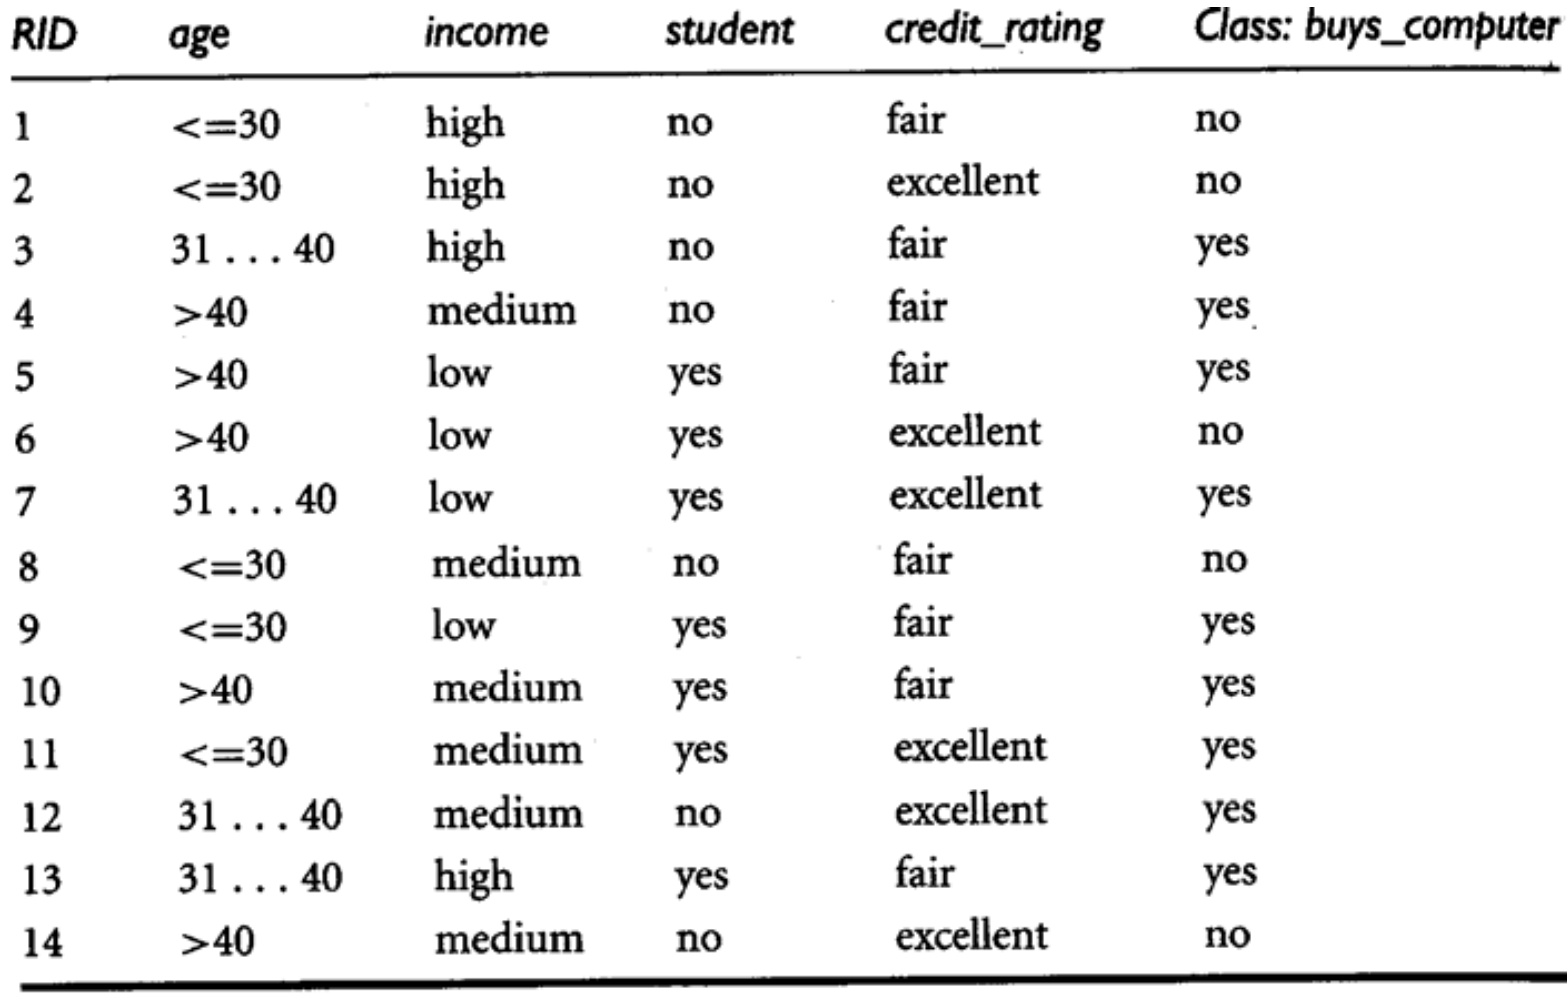

According to given data, please work on the following questions:

1) Please compute  P(yes) and P(no).

2) After obtaining  P(yes) and P(no) from (1), please compute P($E_i$ |yes) and P($E_i$ |no), where i=1,2,3,4.

3) 	Please compute P(yes|E) and P(no|E).


1.1)

1.>
- P(yes) = 9/14
- P(no) = 5/14

2.>
- P($E_1$ |yes) = 2/9
- P($E_1$ |no) = 3/5
- P($E_2$ |yes) = 4/9
- P($E_2$ |no) = 2/5
- P($E_3$ |yes) = 6/9 = 2/3
- P($E_3$ |no) = 1/5
- P($E_4$ |yes) = 6/9 = 2/3
- P($E_4$ |no) = 2/5

3.>
- P(yes|E) = (P($E_1$ |yes) * P($E_2$ |yes) * P($E_3$ |yes) * P($E_4$ |yes) * P(yes))/P(E) = 0.028 / P(E)
- P(no|E) = (P($E_1$ |no) * P($E_2$ |no) * P($E_3$ |no) * P($E_4$ |no) * P(no))/P(E) = 0.012 / P(E)

Therefore, P(yes|E) > P(no|E) and the answer is yes.

### 1.2. Classifying Text by Multinomial Naive Bayes 

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. Here, we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For the simplicity, we will select the categories of 'talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics', and download the training and testing set:

In [2]:
# put above mention in to a list and name it as categories. categories below is empty now.
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

# Generate training and testing data
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Please print 6th training data. Hint: using **data** method.

In [3]:
# put your codes here
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

 Please create a pipeline that attaches it to a multinomial naive Bayes classifier

In [5]:
# put your codes here
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data.

Hint: using **fit** method for training and **predict** method to predict labels on test data.

In [6]:
# put your codes here
model.fit(train.data, train.target)
predictions = model.predict(test.data)
predictions

array([2, 0, 1, ..., 1, 2, 1], dtype=int64)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the classifier. Please use **confusion_matrix** method to plot confusion matrix.

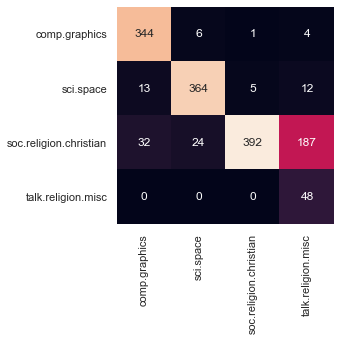

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

# put your codes here
mat = confusion_matrix(test.target, predictions)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel="True Label"
plt.ylabel="Predicted Label"

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity

# **2. Using Machine Learning KNN (K-Nearest Neighbors) to Solve Problems**

This task is to demonstrate the the best practices of solving a problem through the surpervioned machine learning algorithm **KNN** (K-Nearest Neighbors).

To comply with this goal the **IRIS** dataset is used, a very common dataset for data scientists for tests and studies in **ML** (Machine Learning). Furthermore, this is a built-in dataset for ***Scikit-Learn*** or ***Seaborn*** library.


> # **Iris Dataset**
* Iris is a genus of species of flowering plants with showy flowers.
* The iris species here studied, **setosa**, **versicolor** and **virginica** share a similar color: dark violet/blue.
* A way to distinguish visually the species among them is through their petals and sepals dimensions (lenght and width).

> **The first step is to import _Seaborn_ Library and then load the iris dataset from it.**

Differently from the Scikit-Learn that loads the dataset as arrays, Seaborn load it as Panda's Dataframe what saves some steps to build the dataframe, and so, some lines of codes.

In [12]:
import seaborn as sns
iris = sns.load_dataset("iris")

Please check the type of *iris*.

In [13]:
# put your codes here
type(iris)

pandas.core.frame.DataFrame

The method **sample** of a Panda's Dataframe is great way to visualize how the data is stored, like the features and the kind of data of them, with random samples of the Dataframe, non ordered.  

Please use sample function to get 5 random samples.

In [14]:
# put your codes here
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
72,6.3,2.5,4.9,1.5,versicolor
26,5.0,3.4,1.6,0.4,setosa
83,6.0,2.7,5.1,1.6,versicolor
59,5.2,2.7,3.9,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa


There are 4 categories listed: "sepal length (cm)", "sepal width (cm)", "petal length (cm)" and "petal width (cm)".

**With using Pandas library**
, check the number samples for each specie in *iris* dataset. 

Hint: using **value_counts** method

In [15]:
import pandas as pd

In [16]:
# put your codes here)
pd.value_counts(iris.species)

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

The dataset is made of 150 flowers (150 rows), 50 of each specie.

Please get the average, standard deviation, max and min, and the percentiles for each of the features. 

Hint: using **describe** method.

In [17]:
# put your codes here
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


> # **TRAIN and TEST Data**


We are going to use **70% as train** and **30% as test**. 

> ***Panda*** has a solution for this, through a seeded random split of the database. The method **sample** set with **random_state=500** would meake it replicable by anyone. You are free to test with a different number, or even with *train_test_split*.

> The final result is:

>>*   **X_train** and **y_train** **-** for training, data and target, respectively
>>*   **X_test** **-** data for predicting with the algorithm
>>*   **y_test** **-** target for validation the model



In [18]:
train = iris.sample(frac=0.7, random_state=500) # random state is a seed value

In [19]:
test = iris.drop(train.index)

In [20]:
X_train = train.drop(labels='species', axis=1)

In [21]:
y_train = train.species

In [22]:
X_test = test.drop(labels='species', axis=1)

In [23]:
y_test = test.species

Print the shape of X_train and X_test.

In [24]:
# put your codes here
X_train.shape, X_test.shape

((105, 4), (45, 4))

Print the shape of y_train and y_test.

In [25]:
# put your codes here
y_train.shape, y_test.shape

((105,), (45,))

105 rows for the train against 45 rows for the test, to the targets.

> ## **Implement the KNN Classifier**

The KNN Classifier (KNeighborsClassifier) is imported from Scikit-learn.

The **KNeighborsClassifier** has some parameters to improve to improve its performance. The n_neighbors is needed to be set, the others are to be as default.



In [26]:
from sklearn.neighbors import KNeighborsClassifier

Please create a knn classifier model and set n_neighbors to be 3.

In [27]:
# put your codes here
knn = KNeighborsClassifier(n_neighbors=3)

> ## **Training the KNN algorithm**

At this step the algorithm is trained to estimate the best representative function for the data, according to the parameters being used.

**Fit** is the method to adjust the classifier to the data.

In [28]:
# put your codes here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

> ## **Predicting with the Test Data and the KNN Algorithm**

With the algorithm trained and the function stablished it is possible to get the first results predicting against the test data (X_test).

**Predict** is the method to infer results from any data compatible to the ones of the train.

In [29]:
# put your codes here
predictions = knn.predict(X_test)

This is the list of predicted specie of iris from the 45 samples in the **X_test** dataset. To validate the function the result should be matched against the authentic values, represented by **y_test**.

># **Validation**

Technics to to calculate and improve the accuracy and other performance metrics.

> ## **Classification Metrics**

With the **Metrics**, the calculated **precision**, **recall**, **f1-score**, and **accuracy** of each specie.

Hint: using **classification_report** method.

In [30]:
from sklearn import metrics

In [31]:
# put your codes here
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.91      0.95        22
   virginica       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45

